In [134]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

### Первичный обзор датафрейма

In [135]:
# открытие датасета в формате .csv
netflix_df = pd.read_csv('C:/Users/Cmac/Desktop/netflix_titles.csv', parse_dates=['date_added'])
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [136]:
# поиск уникальных значений для вида продукта, страны производства и рейтинга
for column in ['type', 'country', 'rating']:
    print(f'Уникальные значения столбца "{column}": \n{netflix_df[column].unique()}\n')
    print(f'Число уникальных значений: {len(netflix_df[column].unique())}\n\n')

Уникальные значения столбца "type": 
['TV Show' 'Movie']

Число уникальных значений: 2


Уникальные значения столбца "country": 
['Brazil' 'Mexico' 'Singapore' 'United States' 'Turkey' 'Egypt' 'India'
 'Poland, United States' 'Thailand' 'Nigeria' nan
 'Norway, Iceland, United States' 'United Kingdom' 'Japan' 'South Korea'
 'Italy' 'Canada' 'Indonesia' 'Romania' 'Spain' 'Iceland'
 'South Africa, Nigeria' 'France' 'United States, South Africa'
 'Portugal, Spain' 'Hong Kong, China, Singapore' 'United States, Germany'
 'South Africa, China, United States' 'Argentina'
 'United States, France, Serbia' 'Germany' 'Denmark, France, Poland'
 'Poland' 'Kenya' 'New Zealand, United Kingdom' 'Pakistan' 'Australia'
 'Australia, United States' 'Mexico, United States' 'United States, China'
 'China, Hong Kong' 'Taiwan' 'United States, United Kingdom'
 'France, South Korea, Japan' 'United States, Canada'
 'United Kingdom, United States' 'Netherlands, Denmark, South Africa'
 'Canada, United States' 'Denm

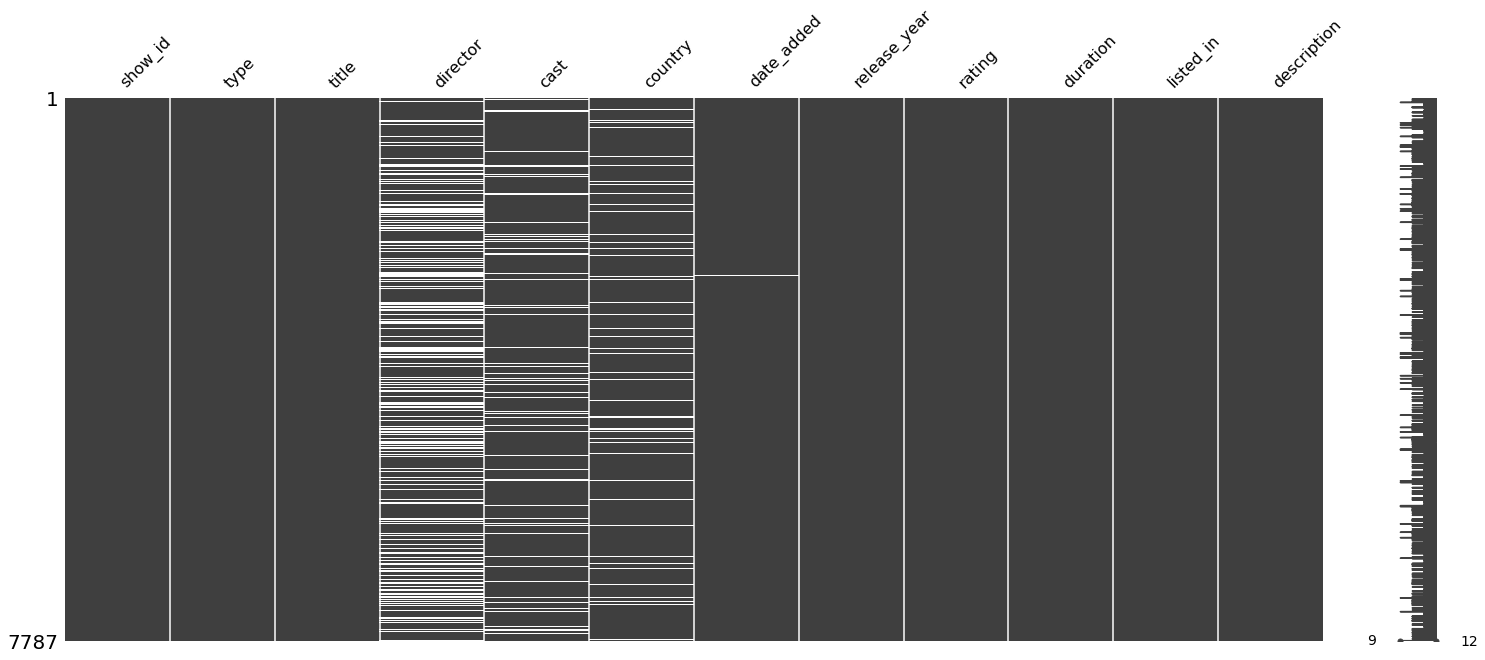

In [137]:
# матрица пропущенных значений
msno.matrix(netflix_df)

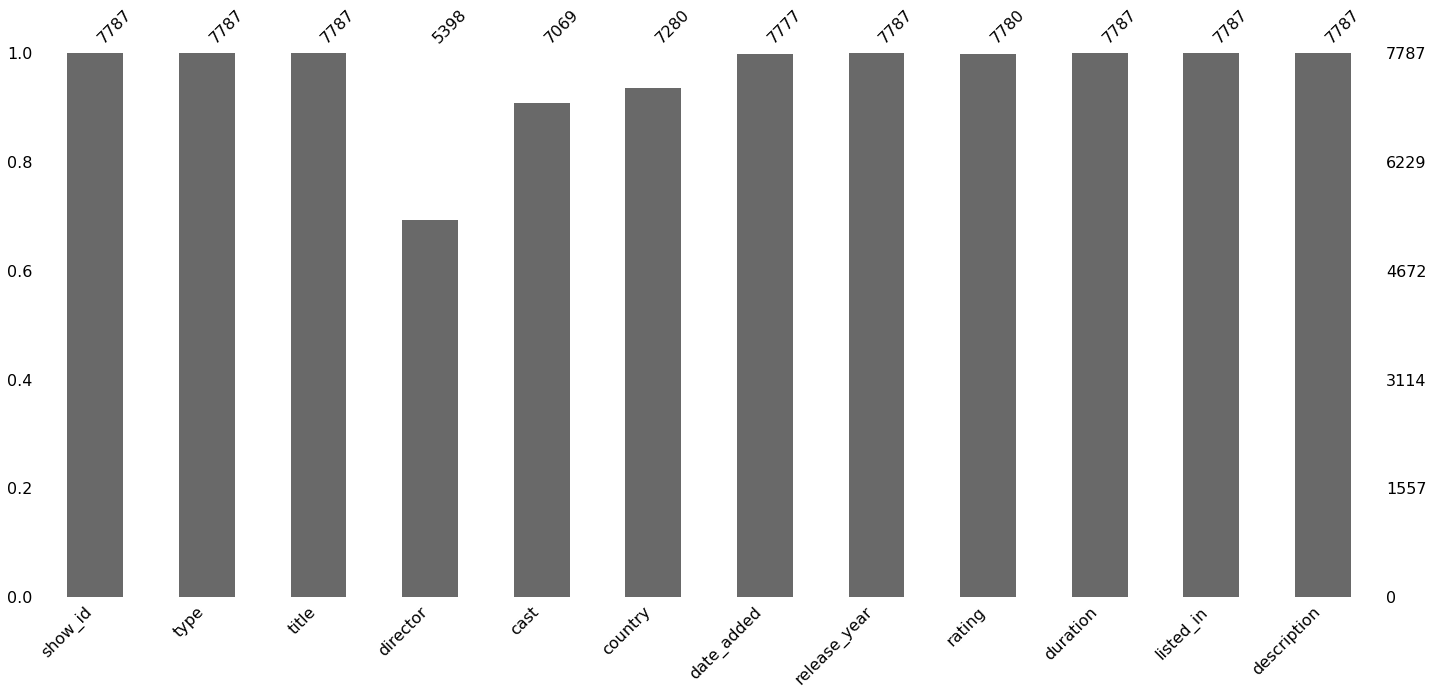

In [138]:
# столбчатая диаграмма пропущенных значений
msno.bar(netflix_df)

In [139]:
# обзор пропущенных значений
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [140]:
# исследование численных значений датафрейма
# можно сделать вывод о медианном значении года релиза продукта на стриминоговом сервисе - 2017
# поскольку среднее значение года находится около значения 2014 года, можно сделать предположение о наличии "возрастных" фильмов и сериалов на стриминговом сервисе
netflix_df.describe(include=[np.number])

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [141]:
# это можно подтвердить следующей строчкой кода (есть фильмы даже 1920 годов, хотя Netflix появился в 1997; очевидно сервис покупает права на их трансляцию у правообладателя)
netflix_df['release_year'].value_counts()

2018    1121
2017    1012
2019     996
2016     882
2020     868
        ... 
1966       1
1947       1
1959       1
1964       1
1925       1
Name: release_year, Length: 73, dtype: int64

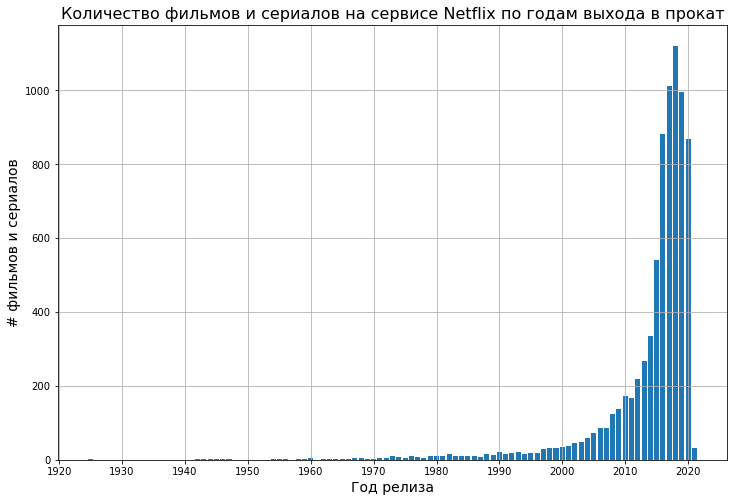

In [142]:
# по графику можно увидеть резкий рост в 2010-е гг. некоторое падение выхода фильмов и сериалов, который наблюдается с 2019 года из-за пандемии коронавируса (карантин, коронавирусные ограничения)
x_range = np.arange(1920, 2021, 10)
plt.figure(figsize=(12, 8))
plt.title('Количество фильмов и сериалов на сервисе Netflix по годам выхода в прокат', size=16)
plt.bar(netflix_df['release_year'].value_counts().index, netflix_df['release_year'].value_counts())
plt.xlabel('Год релиза', size=14)
plt.ylabel('# фильмов и сериалов', size=14)
plt.xticks(x_range)
plt.grid()
plt.show()

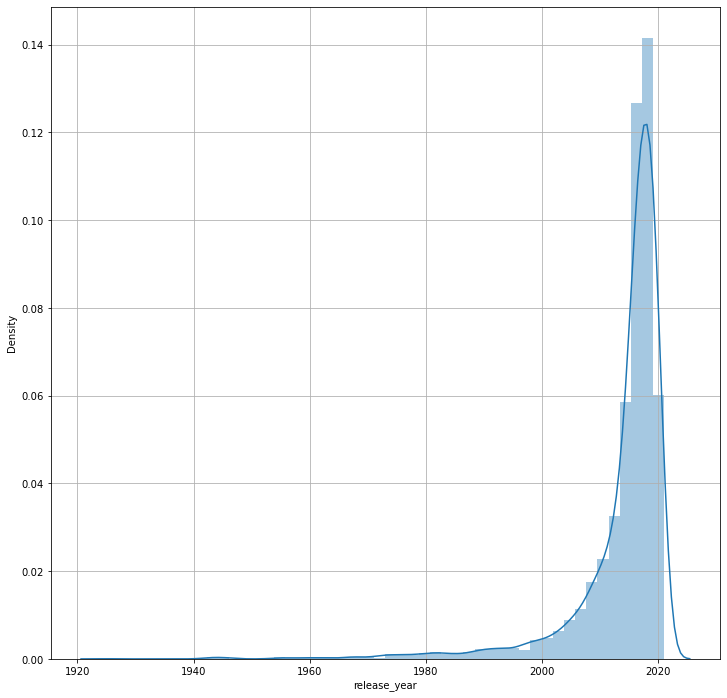

In [143]:
# похожий график можно построить и в относительных единицах
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12))
sns.distplot(netflix_df['release_year'], ax=ax)
plt.grid()
plt.show()

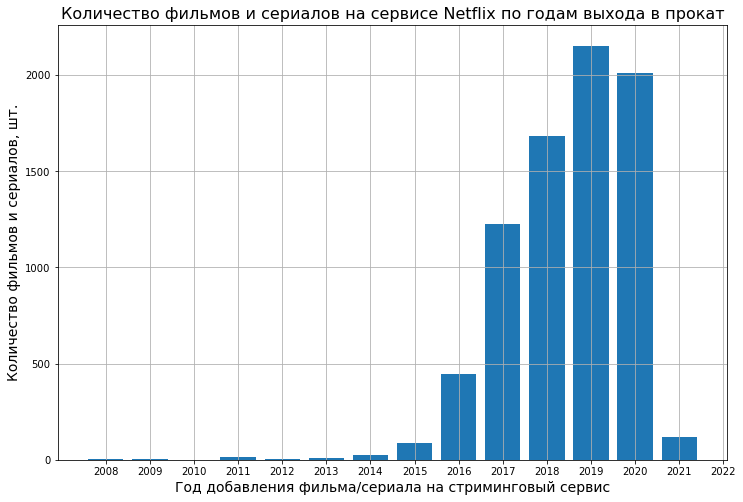

In [166]:
# ожидаемо наибольшее количество фильмов на Netflix было добавлено в 2019-2020 гг. (самоизоляция, высокий спрос на стриминговые сервисы во время пандемии - легальный доступ к лицензионному контенту)
x_range = np.arange(2008, 2023)
plt.figure(figsize=(12, 8))
plt.title('Количество фильмов и сериалов на сервисе Netflix по годам выхода в прокат', size=16)
plt.bar(netflix_df['date_added'].dt.year.value_counts().index, netflix_df['date_added'].dt.year.value_counts())
plt.xlabel('Год добавления фильма/сериала на стриминговый сервис', size=14)
plt.ylabel('Количество фильмов и сериалов, шт.', size=14)
plt.xticks(x_range)
plt.grid()
plt.show()

In [145]:
# исследование объектных значений датафрейма
# можно обнаружить, что количество уникальных стран 681(!), а количество уникальных жанров равно 492 (!) что явно больше чем количество существующих стран и жанров соответстсвенно
# очевидно, речь идет о комбинациях стран и жанров, которые можно вычленить по отдельности от датафрейма
netflix_df.describe(include=[np.object])

,show_id,type,title,director,cast,country,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,14,216,492,7769
top,s936,Movie,New York Minute,"Raúl Campos, Jan Suter",David Attenborough,United States,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,1,5377,1,18,18,2555,2863,1608,334,3


### Поиск уникальных значений стран

In [146]:
# вычленение из датафрейма строк, НЕ содержащих пустые значения стран съёмок
not_na_countries_df = netflix_df[netflix_df['country'].notna()].reset_index()
not_na_countries_df

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7275,7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7276,7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7277,7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7278,7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [147]:
# словарь для стран-производителей продуктов (ключи-страны, значения-число изготовленных фильмов/сериалов)
unique_countries_dict = dict()
for i in range(len(not_na_countries_df)):
    for i_country in not_na_countries_df['country'][i].split(', '):
        if i_country not in unique_countries_dict:
            unique_countries_dict[i_country] = 1
        else:
            unique_countries_dict[i_country] += 1

# сортировка словаря по значениям в порядке убывания           
sorted_countries_dict = dict()
sorted_values = sorted(unique_countries_dict.values(), reverse = True)
for i_value in sorted_values:
    for i_country in unique_countries_dict.keys():
        if unique_countries_dict[i_country] == i_value:
            sorted_countries_dict[i_country] = i_value
sorted_countries_dict

{'United States': 3296,
 'India': 990,
 'United Kingdom': 722,
 'Canada': 412,
 'France': 349,
 'Japan': 287,
 'Spain': 215,
 'South Korea': 212,
 'Germany': 199,
 'Mexico': 154,
 'China': 147,
 'Australia': 144,
 'Egypt': 110,
 'Turkey': 108,
 'Hong Kong': 102,
 'Italy': 90,
 'Brazil': 88,
 'Taiwan': 85,
 'Belgium': 85,
 'Argentina': 82,
 'Indonesia': 80,
 'Philippines': 78,
 'Nigeria': 76,
 'Thailand': 65,
 'South Africa': 54,
 'Netherlands': 45,
 'Colombia': 45,
 'Denmark': 44,
 'Ireland': 40,
 'Singapore': 39,
 'Sweden': 39,
 'Poland': 35,
 'United Arab Emirates': 34,
 'Norway': 29,
 'New Zealand': 28,
 'Russia': 27,
 'Israel': 26,
 'Chile': 26,
 'Lebanon': 26,
 'Malaysia': 26,
 'Pakistan': 24,
 'Czech Republic': 20,
 'Switzerland': 17,
 'Uruguay': 14,
 'Romania': 12,
 'Luxembourg': 11,
 'Finland': 11,
 'Austria': 11,
 'Peru': 10,
 'Saudi Arabia': 10,
 'Greece': 10,
 'Iceland': 9,
 'Bulgaria': 9,
 'Hungary': 9,
 'Jordan': 8,
 'Serbia': 7,
 'Qatar': 7,
 'Kuwait': 7,
 'Morocco': 6,
 

In [148]:
# создание датафрейма на основе первого словаря
# 121 страна так или иначе участвовала в создании хотя бы одного проекта, выложенного на Netflix
countries_df = pd.DataFrame.from_dict(sorted_countries_dict, orient='index')
countries_df = countries_df.reset_index()
countries_df.columns = ['country', 'products_count']
countries_df

,country,products_count
0,United States,3296
1,India,990
2,United Kingdom,722
3,Canada,412
4,France,349
...,...,...
116,Panama,1
117,"United Kingdom,",1
118,Uganda,1
119,East Germany,1


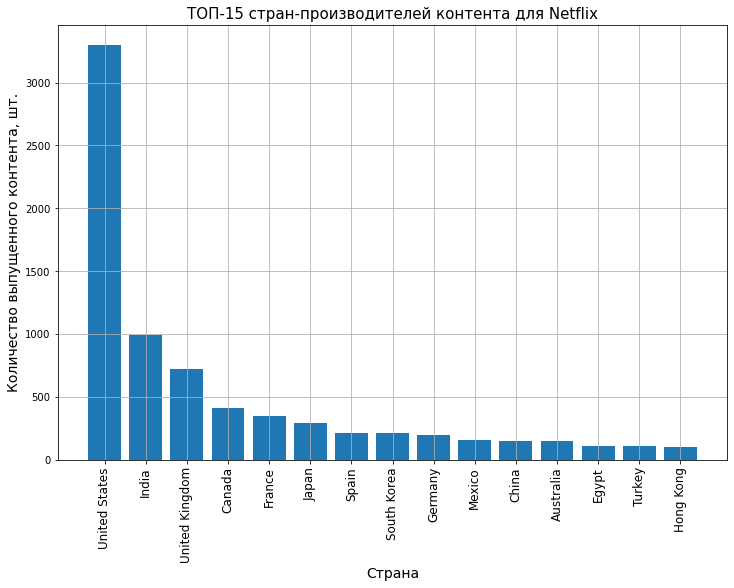

In [174]:
# ТОП-15 стран, выпустивших (прямо или косвенно) контент для Netflix
# лидером ожидаемо является США, на втором месте неожиданно Индия, Китай на 11 месте, что может быть связано с политикой Китая (внутренний рынок кино + сотрудничество с Disney)
plt.figure(figsize=(12,8))
plt.title('ТОП-15 стран-производителей контента для Netflix', size=15)
plt.bar(countries_df['country'][:15], countries_df['products_count'][:15])
plt.xlabel('Страна', size=14)
plt.ylabel('Количество выпущенного контента, шт.', size=14)
plt.xticks(rotation=90, size=12)
plt.grid()
plt.show()

### Поиск уникальных значений жанров

In [149]:
# отсортированный словарь для жанров (ключи-жанры, значения-число изготовленных фильмов/сериалов)
unique_genres_dict = dict()
for i in range(len(netflix_df)):
    for i_genre in netflix_df['listed_in'][i].split(', '):
        if i_genre not in unique_genres_dict:
            unique_genres_dict[i_genre] = 1
        else:
            unique_genres_dict[i_genre] += 1
            
# сортировка словаря по значениям в порядке убывания 
sorted_genres_dict = dict()
sorted_values = sorted(unique_genres_dict.values(), reverse = True)
for i_value in sorted_values:
    for i_genre in unique_genres_dict.keys():
        if unique_genres_dict[i_genre] == i_value:
            sorted_genres_dict[i_genre] = i_value
sorted_genres_dict

{'International Movies': 2437,
 'Dramas': 2106,
 'Comedies': 1471,
 'International TV Shows': 1199,
 'Documentaries': 786,
 'Action & Adventure': 721,
 'TV Dramas': 704,
 'Independent Movies': 673,
 'Children & Family Movies': 532,
 'Romantic Movies': 531,
 'TV Comedies': 525,
 'Thrillers': 491,
 'Crime TV Shows': 427,
 "Kids' TV": 414,
 'Docuseries': 353,
 'Romantic TV Shows': 333,
 'Stand-Up Comedy': 329,
 'Music & Musicals': 321,
 'Horror Movies': 312,
 'British TV Shows': 232,
 'Reality TV': 222,
 'Sci-Fi & Fantasy': 218,
 'Sports Movies': 196,
 'Korean TV Shows': 150,
 'TV Action & Adventure': 150,
 'Anime Series': 148,
 'Spanish-Language TV Shows': 147,
 'Classic Movies': 103,
 'TV Mysteries': 90,
 'LGBTQ Movies': 90,
 'Science & Nature TV': 85,
 'TV Sci-Fi & Fantasy': 76,
 'TV Horror': 69,
 'Teen TV Shows': 60,
 'Cult Movies': 59,
 'Faith & Spirituality': 57,
 'Anime Features': 57,
 'Movies': 56,
 'Stand-Up Comedy & Talk Shows': 52,
 'TV Thrillers': 50,
 'Classic & Cult TV': 27,

In [150]:
# создание датафрейма на основе второго словаря
# всего на Netflix представлено 42 жанра и их различных комбинаций
# среди контента есть весьма странный для российского зрителя - LGBTQ Movies
genres_df = pd.DataFrame.from_dict(sorted_genres_dict, orient='index')
genres_df = genres_df.reset_index()
genres_df.columns = ['genre', 'products_count']
genres_df

,genre,products_count
0,International Movies,2437
1,Dramas,2106
2,Comedies,1471
3,International TV Shows,1199
4,Documentaries,786
5,Action & Adventure,721
6,TV Dramas,704
7,Independent Movies,673
8,Children & Family Movies,532
9,Romantic Movies,531


### Содержание датафрейма

Исследуемый датасет netflix_df содержит следующие значения в столбцах:

* show_id - уникальный идентификатор продукта (фильма/сериала);
* type - вид продукта (TV Show - телешоу/сериал или Movie - фильм);
* title - название продукта;
* director - режиссер проекта;
* cast - кто снимался в ролях;
* country - страна, в которой снимался продукт (перечислены ранее в словаре);
* date_added - дата добавления на стриминговый сервис;
* release_year - год релиза (выхода в прокат или на ТВ);
* rating - рейтинг (для кино: G, PG, PG-13, R, NC-17; и ТВ-проектов: TV-Y, TV-Y7 и TV-Y7-FV, TV-G, TV-PG, TV-14, TV-MA) + рейтинги NR (Not Rated) и UR (Unrated);
* duration - продолжительность (в сезонах для сериалов и в минутах для полнометражных фильмов);
* listed_in - жанры фильма и/или ТВ сериала (перечислены ранее в словаре);
* description - краткое описание сюжета.

Краткий обзор рейтингов (данные взяты с https://posmotre.li/%D0%A1%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D0%B0_%D1%80%D0%B5%D0%B9%D1%82%D0%B8%D0%BD%D0%B3%D0%BE%D0%B2_%D0%B4%D0%BB%D1%8F_%D0%BA%D0%B8%D0%BD%D0%BE%D1%84%D0%B8%D0%BB%D1%8C%D0%BC%D0%BE%D0%B2): 
* Рейтинг G (General): Фильм можно показывать любым детям без ограничений.
* Рейтинг PG (Parental guidance): Фильм содержит моменты, которые могут быть неподобающими для детей (например, в кадре промелькнет кто-нибудь голый). Родителям рекомендуется ознакомиться, какие именно, и стоит ли их ребенку смотреть такой фильм.
* Рейтинг PG-13 (Parental guidance for children under 13): Фильм содержит моменты, которые могут быть неподобающими для детей до 13 лет (например, кто-нибудь кого-нибудь пошлет матом или хорошо подрался). Рейтинг был выделен из PG в 1984 г.
* Рейтинг R (Restricted): Дети до 17 лет допускаются только при сопровождении взрослого. Обычный "фак-перефак", или боевик со множеством смертей, но без особого их смакования, или сексуальные сцены, но без излишнего графизма.
* Рейтинг NC-17 (No children under 17): Дети до 17 лет к просмотру не допускаются. До 1990 г. рейтинг обозначался как X и был переименован из-за того, что икс к тому времени стойко ассоциировался с порнографией и губил прокат недетских, но вполне пристойных фильмов.
    
* Рейтинг TV-Y (Young): Телепрограмма специально предназначенная для просмотра детьми любого возраста.
* Рейтинг TV-Y7 (Young above 7): Телепрограмма специально предназначенная для просмотра детьми старше семи лет. Программы с описанием содержания «FV» демонстрируют больше «фантазийного насилия» и обычно более интенсивны или агрессивны, чем другие программы с рейтингом TV-Y7.
* Рейтинг TV-G (General): Аналог кинорейтинга G.
* Рейтинг TV-PG (Parental guidance): Аналог кинорейтинга PG.
* Рейтинг TV-14 (14 and above): Аналог кинорейтинга PG-13.
* Рейтинг TV-MA (Mature audience): Аналог кинорейтинга R.

### Небольшой обзор и средняя/медианная продолжительность контента

In [151]:
# распределение контента по виду (полнометраджный или сериал)
netflix_types_df = netflix_df.groupby('type').agg('count').reset_index()
netflix_types_df = netflix_types_df.loc[0:2, ['type', 'show_id']]
netflix_types_df.columns = ['type', 'count']
netflix_types_df

,type,count
0,Movie,5377
1,TV Show,2410


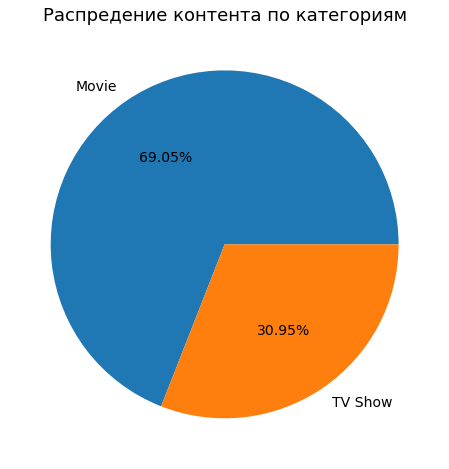

In [152]:
# построение круговой диаграммы
# полнометражных фильмы составляют 69% всего контента, сериалы - около 31%
plt.figure(figsize=(12,8))
plt.title('Распредение контента по категориям', size=18)
plt.pie(netflix_types_df['count'], labels = netflix_types_df['type'], autopct="%0.2f%%", textprops={'fontsize': 14})
plt.show()

In [153]:
# поиск средней продолжительности для фильмов и сериалов
# для этого избавимся от лишних описаний, оставив только численные аргументы в столбце "duration" (количество сезонов для сериала и минут для полнометражного контента)
for j in range(len(netflix_df['duration'])):
    netflix_df['duration'][j] = netflix_df['duration'][j].split(' ')[0]
netflix_df['duration'] = netflix_df['duration'].astype('int')
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,2019,TV-MA,44,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [154]:
# поиск среднего и медианного значения длительности сериала и полнометражного фильма
# типовой сериал на Netflix длится в среднем около 1-2 сезонов, полнометражный фильм - около 100 минут (1 час 40 минут), что и расчитано на среднего зрителя
durarion_df = netflix_df[['type', 'duration']]
durarion_df.groupby('type').agg(['mean', 'median', 'min', 'max'])

duration                
              mean median min  max
type                              
Movie    99.307978     98   3  312
TV Show   1.775934      1   1   16

### Гипотезы и их проверки

In [155]:
# Гипотеза 1: количество жестокого контента на платформе Netflix со временем растет как в относительном, так и в абсолютном отношении
# гипотеза нацелена на современную аудиторию, поскольку многие современные родители склонны утверждать рост жестокости в среде массовой культуры
# за жестокие фильмы будем считать фильмы категорий R, NC-17, TV-MA

In [156]:
# выделение месяцев и годов добавления на Netflix для проверки дальнейших гипотез
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month
netflix_df['month_added_name'] = netflix_df['date_added'].dt.month_name()
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_added_name
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0,August
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0,December
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0,December
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0,November
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020.0,1.0,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020.0,10.0,October
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019.0,3.0,March
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,2019,TV-MA,44,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020.0,9.0,September
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020.0,10.0,October


In [157]:
# количество добавленных с на Netflix за каждый год
films_added_df = netflix_df[['year_added', 'show_id']].groupby('year_added').agg('count').reset_index()
films_added_df.columns = ['year_added', 'products_count']
films_added_df

,year_added,products_count
0,2008.0,2
1,2009.0,2
2,2010.0,1
3,2011.0,13
4,2012.0,3
5,2013.0,11
6,2014.0,25
7,2015.0,88
8,2016.0,443
9,2017.0,1225


In [158]:
# добавление в датафрейм статуса жестокого фильма
netflix_df['violence_content'] = 0
for j in range(len(netflix_df)):
    netflix_df['violence_content'][j] = np.where(netflix_df['rating'][j] in ['R', 'NC-17', 'TV-MA'], 1, 0)
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_added_name,violence_content
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0,August,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0,December,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0,December,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0,November,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020.0,1.0,January,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020.0,10.0,October,1
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019.0,3.0,March,0
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,2019,TV-MA,44,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020.0,9.0,September,1
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020.0,10.0,October,0


In [159]:
# количество добавленных жестоких фильмов/сериалов на Netflix за каждый год
violence_films_added_df = netflix_df[netflix_df['violence_content'] == 1]
violence_films_added_df = violence_films_added_df[['year_added', 'show_id']].groupby('year_added').agg('count').reset_index()
violence_films_added_df.columns = ['year_added', 'violence_products_count']
violence_films_added_df

,year_added,violence_products_count
0,2008.0,2
1,2009.0,2
2,2011.0,3
3,2012.0,1
4,2013.0,3
5,2014.0,12
6,2015.0,32
7,2016.0,178
8,2017.0,522
9,2018.0,792


In [160]:
# объединим 2 датафрейма и найдем процент жестоких фильмов
merged_df = violence_films_added_df.merge(films_added_df)
merged_df['conversion, %'] = np.round(merged_df['violence_products_count'] / merged_df['products_count'] * 100, 2)
merged_df

,year_added,violence_products_count,products_count,"conversion, %"
0,2008.0,2,2,100.00
1,2009.0,2,2,100.00
2,2011.0,3,13,23.08
3,2012.0,1,3,33.33
4,2013.0,3,11,27.27
5,2014.0,12,25,48.00
6,2015.0,32,88,36.36
7,2016.0,178,443,40.18
8,2017.0,522,1225,42.61
9,2018.0,792,1685,47.00


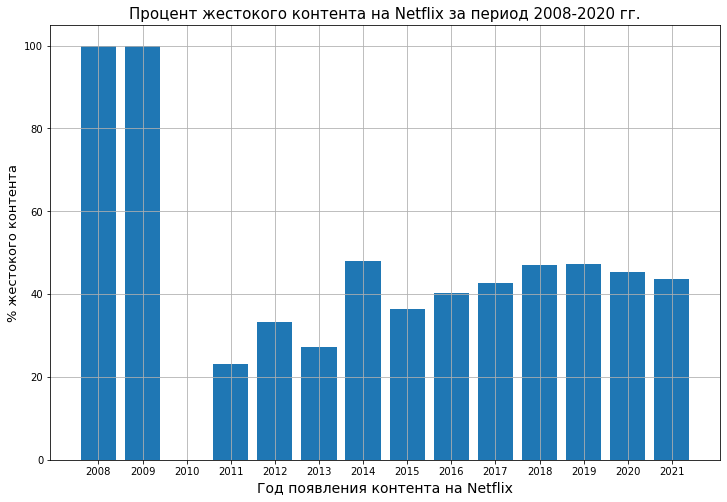

In [161]:
# график на базе вышепредставленного датафрейма
plt.figure(figsize=(12,8))
plt.title('Процент жестокого контента на Netflix за период 2008-2020 гг.', size=15)
x_range = np.arange(2008, 2022, 1)
plt.bar(merged_df['year_added'], merged_df['conversion, %'])
plt.xlabel('Год появления контента на Netflix', size=14)
plt.ylabel('% жестокого контента', size=13)
plt.xticks(x_range)
plt.grid()
plt.show()

Вывод по гипотезе: количество жестоких фильмов в абсолютных значениях изменяется в соответствии с общим количеством фильмов, добавленных на сервис. В процентном соотношении гипотеза может иметь подтверждение: после 2016 года (год добавления 443 фильмов и сериалов на сервис, что является значительной выборкой, до этого количество годового контента было не столь велико) процент претерпевал как рост так и падение, но в целом динамика с 2016 по 2020 гг. положительная, хоть и незначительная. Для 2021 года не хватает данных, однако можно судить, что в любом случае больше половины контента на Netflix не является жестоким.

In [162]:
# Гипотеза 2: наибольшее количество фильмов и сериалов стриминговый сервис добавляет в новогодние каникулы (декабрь-январь)

In [163]:
# составим датафрейм на базе основного датафрейма
month_added_df = netflix_df[['month_added', 'month_added_name', 'show_id']].groupby(['month_added', 'month_added_name']).agg('count').reset_index()
month_added_df.columns = ['month_added', 'month_added_name', 'products_count']
month_added_df

,month_added,month_added_name,products_count
0,1.0,January,757
1,2.0,February,472
2,3.0,March,669
3,4.0,April,601
4,5.0,May,543
5,6.0,June,542
6,7.0,July,600
7,8.0,August,618
8,9.0,September,619
9,10.0,October,785


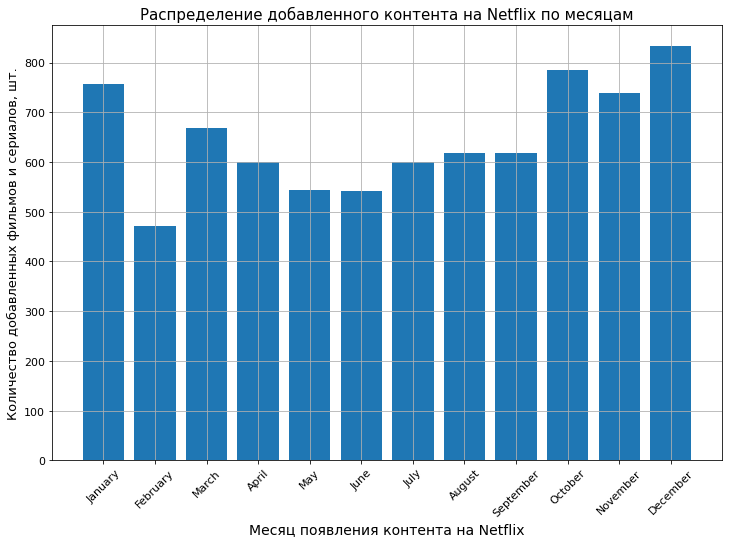

In [164]:
# график на базе вышепредставленного датафрейма
plt.figure(figsize=(12,8))
plt.title('Распределение добавленного контента на Netflix по месяцам', size=15)
plt.bar(month_added_df['month_added_name'], month_added_df['products_count'])
plt.xlabel('Месяц появления контента на Netflix', size=14)
plt.ylabel('Количество добавленных фильмов и сериалов, шт.', size=13)
plt.xticks(size=11, rotation=45)
plt.yticks(size=11)
plt.grid()
plt.show()

Вывод по гипотезе: количество добавленного контента в новогодние праздники (период декабрь-январь) действительно максимален. Вообще, в целом период с октября по январь показывает наибольший прирост контента. Объяснить это можно двумя причинами: 1) продолжительные новогодние каникулы, в которые пользователи Netflix, способны отдохнуть от трудовых будней и посмотреть фильмы и сериалы; 2) выход цифровых релизов фильмов, вышедших в прокате в летний период (цифровая версия фильма после окончания проката может выходить в течение 3 и более месяцев).

In [ ]:
# Гипотеза 3: по году выхода контента и его продолжительности можно определить тип контента

In [176]:
# импортируем необходимые библиотеки (задача классификации), создадим массивы для "кормления" 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

X = netflix_df[['release_year', 'duration']]
Y = netflix_df['type']

In [178]:
# запуск механизма обучения
cl = DecisionTreeClassifier().fit(X, Y)

In [179]:
# просмотр дерева решений
print(export_text(cl))

|--- feature_1 <= 13.50
|   |--- feature_1 <= 10.50
|   |   |--- feature_1 <= 7.50
|   |   |   |--- feature_1 <= 2.50
|   |   |   |   |--- class: TV Show
|   |   |   |--- feature_1 >  2.50
|   |   |   |   |--- feature_0 <= 2014.50
|   |   |   |   |   |--- feature_0 <= 2013.50
|   |   |   |   |   |   |--- class: TV Show
|   |   |   |   |   |--- feature_0 >  2013.50
|   |   |   |   |   |   |--- feature_1 <= 3.50
|   |   |   |   |   |   |   |--- class: TV Show
|   |   |   |   |   |   |--- feature_1 >  3.50
|   |   |   |   |   |   |   |--- class: TV Show
|   |   |   |   |--- feature_0 >  2014.50
|   |   |   |   |   |--- feature_1 <= 4.50
|   |   |   |   |   |   |--- class: TV Show
|   |   |   |   |   |--- feature_1 >  4.50
|   |   |   |   |   |   |--- feature_0 <= 2019.50
|   |   |   |   |   |   |   |--- class: TV Show
|   |   |   |   |   |   |--- feature_0 >  2019.50
|   |   |   |   |   |   |   |--- feature_1 <= 5.50
|   |   |   |   |   |   |   |   |--- feature_0 <= 2020.50
|   |   |   | 

In [185]:
# просмотр предсказанных и реальных значений вида контента
for predicted_type, real_type in zip(cl.predict(X), netflix_df['type']):
    print('Предсказанный вид контента: {}   Реальный вид контента: {}'.format(predicted_type, real_type))

Предсказанный вид контента: TV Show   Реальный вид контента: TV Show
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: TV Show   Реальный вид контента: TV Show
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: TV Show   Реальный вид контента: TV Show
Предсказанный вид контента: TV Show   Реальный вид контента: TV Show
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказа

Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: TV Show   Реальный вид контента: TV Show
Предсказанный вид контента: TV Show   Реальный вид контента: TV Show
Предсказанный вид контента: TV Show   Реальный вид контента: TV Show
Предсказанный вид контента: TV Show   Реальный вид контента: TV Show
Предсказанный вид контента: TV Show   Реальный вид контента: TV Show
Предсказанный вид контента: TV Show   Реальный вид контента: TV Show
Предсказанный вид контента: TV Show   Реальный вид контента: TV Show
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: TV Show   Реальный вид контента: TV Show
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: TV Show   Реальный вид контента: TV Show
Предсказанный вид контента: Movie   Реальный вид конте

Предсказанный вид контента: TV Show   Реальный вид контента: TV Show
Предсказанный вид контента: TV Show   Реальный вид контента: TV Show
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: TV Show   Реальный вид контента: TV Show
Предсказанный вид контента: TV Show   Реальный вид контента: TV Show
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: TV Show   Реальный вид контента: TV Show
Предсказанный вид контента: TV Show   Реальный вид контента: TV Show
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: Movie   Реальный вид контента: Movie
П

Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: TV Show   Реальный вид контента: TV Show
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: TV Show   Реальный вид контента: TV Show
Предсказанный вид контента: TV Show   Реальный вид контента: TV Show
Предсказанный вид контента: TV Show   Реальный вид контента: TV Show
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: TV Show   Реальный вид контента: TV Show
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предсказанный вид контента: Movie   Реальный вид контента: Movie
Предс

In [194]:
# предскажем вид для контента 2025 года выхода продолжительностью 8 (минут или сезонов)
cl.predict([[2025, 8]])

array(['TV Show'], dtype=object)

In [195]:
# предскажем вид для контента 2019 года выхода продолжительностью 76 (минут или сезонов)
cl.predict([[2025, 76]])

array(['Movie'], dtype=object)

Вывод по гипотезе: базовое машинное обучение (задача классификации) позволяет определить тип контента на стриминговом серсиве Netflix.